# T Gate

This program simulates T Gate \
Author: Ema Žánová \
Time: 08.12.2025 \
Note: Ensure you have installed the requirements.txt or environment.yml before running this notebook.

## 1. Introduction 
In Qiskit, the **T gate** is a single-qubit quantum gate that applies a π/4 (45°) phase shift to the |1> state:  

$$
Y = \begin{bmatrix}
1 & 0 \\
0 & e^{i\pi/4}
\end{bmatrix}
$$

It’s also called the **π/8 gate** because it rotates around the Z-axis of the Bloch sphere by π/4 radians. It’s important for building universal quantum circuits, especially in fault-tolerant quantum computing.




## 2. Set the initial states
In the code cell below, we set all six qbits to initial states: |0>, |1>, |i>, |-i>, |+> and |->, so we can later observe, how the Y gate changes them.

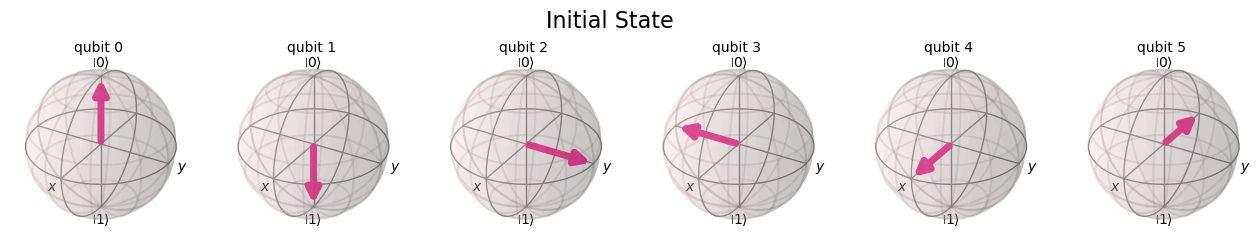

In [17]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
import numpy as np

qreg_q = QuantumRegister(6, 'q')
creg_c = ClassicalRegister(6, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

# the 0th qubit is set to |0> automatically

circuit.x(qreg_q[1])  # Apply X gate to qubit 1 - set state to |1>

circuit.h(qreg_q[2])  # Apply Hadamard gate to qubit 2 - set to superposition state |+>
circuit.s(qreg_q[2])  # Apply S gate to qubit 2 - set to state |i>

circuit.h(qreg_q[3])  # Apply Hadamard gate to qubit 3 - set to superposition state |+>
circuit.sdg(qreg_q[3])  # Apply S-dagger gate to qubit 3 - step to state |-i>

circuit.h(qreg_q[4])  # Apply Hadamard gate to qubit 4 - set to superposition state |+>
# Apply X and Hadamard gate to qubit 5 - set to superposition state |+>
circuit.x(qreg_q[5])
circuit.h(qreg_q[5])

circuit.barrier()



plot_bloch_multivector(Statevector(circuit), title="Initial State")

## 3. Apply the Y Gate 

Now, we apply the Y Gate to each qbit in the circuit. 

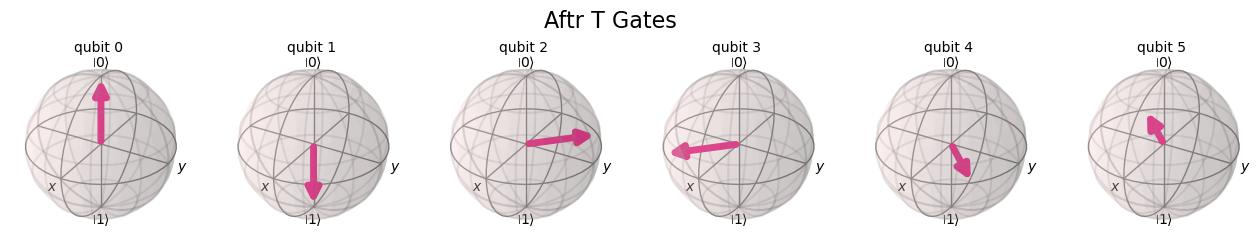

In [18]:
circuit.t(range(6))  # Apply T gate to all qubits

plot_bloch_multivector(Statevector(circuit), title="Aftr T Gates")

As you can see, the gate rotated the qubit around the Z axis by π/8 radians

Our state of the circuit in ket notation:

In [19]:
Statevector(circuit).draw("latex")

<IPython.core.display.Latex object>

The circuit is rendered below:

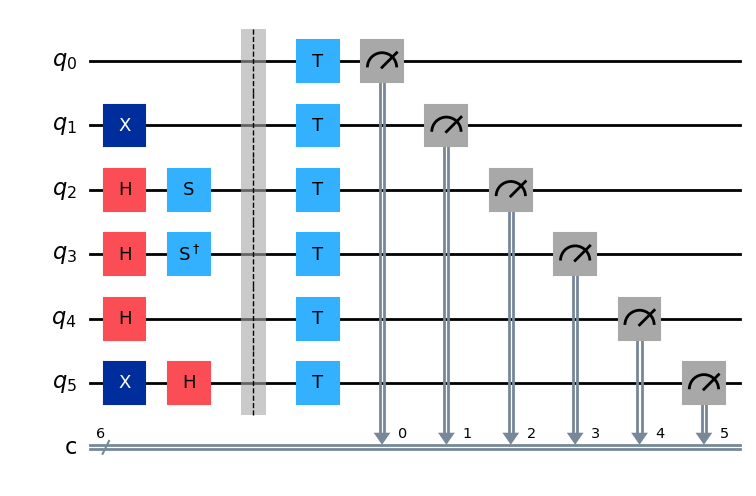

In [20]:
circuit.measure(range(6), range(6))
circuit.draw("mpl")

We are begginig with one qubit with value of
$$
|0\rangle =
\begin{bmatrix}
1 \\
0
\end{bmatrix}
$$

Then we have Hadamard matrix (or gate) with value of

$$
H =
\frac{1}{\sqrt{2}} \cdot
\begin{bmatrix}
1 & 1 \\
1 & -1
\end{bmatrix}
$$

So first of all we multiply the qubit with Hadamard matrix


$$
H \cdot |0\rangle =
\frac{1}{\sqrt{2}} \cdot
\begin{bmatrix}
1 & 1 \\
1 & -1
\end{bmatrix}
\cdot
\begin{bmatrix}
1 \\
0
\end{bmatrix}
=
\frac{1}{\sqrt{2}} \cdot
\begin{bmatrix}
1 \cdot 1 + 1 \cdot 0 \\
1 \cdot 1 + (-1) \cdot 0
\end{bmatrix}
=
\frac{1}{\sqrt{2}} \cdot
\begin{bmatrix}
1 \\
1
\end{bmatrix}
=
\begin{bmatrix}
\frac{1}{\sqrt{2}} \\
\frac{1}{\sqrt{2}}
\end{bmatrix}
= |+\rangle
$$

Now let's have matrix for T gate 

$$
T =
\begin{bmatrix}
1 & 0 \\
0 & e^{i\pi/4}
\end{bmatrix}

$$

Now we multiply our answer with  matrix and we wil get our final matrix that represent ours vector

$$
T \cdot H \cdot |0\rangle =
\begin{bmatrix}
1 & 0 \\
0 & e^{i\pi/4}
\end{bmatrix}
\cdot
\begin{bmatrix}
\frac{1}{\sqrt{2}} \\
\frac{1}{\sqrt{2}}
\end{bmatrix}
=
\begin{bmatrix}
1 \cdot \frac{1}{\sqrt{2}} + 0 \cdot \frac{1}{\sqrt{2}} \\
0 \cdot \frac{1}{\sqrt{2}} + e^{i\pi/4} \cdot \frac{1}{\sqrt{2}}
\end{bmatrix}
=
\begin{bmatrix}
\frac{1}{\sqrt{2}} \\
\frac{e^{i\pi/4}}{\sqrt{2}}
\end{bmatrix}
$$

$T |1> =
\begin{bmatrix}
0 \\
e^{i\pi/4}
\end{bmatrix}
$

\
$T |+> =
\begin{bmatrix}
\frac{\sqrt{2}}{2} \\
\frac{\sqrt{2}}{2} e^{i\pi/4}
\end{bmatrix}
$

\
$T |-> =
\begin{bmatrix}
\frac{\sqrt{2}}{2} \\
-\frac{\sqrt{2}}{2} e^{i\pi/4}
\end{bmatrix}
$

\
$T |i> =
\begin{bmatrix}
\frac{1}{\sqrt{2}} \\
\frac{i}{\sqrt{2}} e^{i\pi/4}
\end{bmatrix}
$

\
$T |-i> =
\begin{bmatrix}
\frac{1}{\sqrt{2}} \\
-\frac{i}{\sqrt{2}} e^{i\pi/4}
\end{bmatrix}
$


## 3. Measurment
There is the result after we measure the circuit:

In [21]:
sim = AerSimulator(shots=5000)
result = sim.run(circuit).result()

print(result.get_counts(circuit))

{'001110': 342, '101110': 303, '110010': 333, '011110': 307, '010010': 318, '100010': 282, '111110': 302, '000010': 286, '110110': 324, '101010': 321, '001010': 312, '010110': 322, '100110': 316, '111010': 309, '000110': 290, '011010': 333}


As you can see, the 0th qubit is always 1 sand the 1st qubit is always 0. The rest was in superposition. 